In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
data=pd.read_csv(r"C:\Users\Jaya\Downloads\500_Person_Gender_Height_Weight_Index.csv")

In [6]:
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [7]:
data.tail()

,Gender,Height,Weight,Index
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5
499,Male,173,131,5


In [9]:
data.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [11]:
from sklearn import svm
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split

In [12]:
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [13]:
gender=LabelEncoder()
data['Gender']=gender.fit_transform(data['Gender'])

In [15]:
data.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


In [16]:
bins=(-1,0,1,2,3,4,5)
health=['malnourished','underweight','fit','slightly overweight','overweight','extremly overweight']
data['Index']=pd.cut(data['Index'],bins=bins,labels=health)

In [17]:
data['Index']

0               overweight
1                      fit
2               overweight
3      slightly overweight
4      slightly overweight
5      slightly overweight
6      extremly overweight
7      extremly overweight
8      slightly overweight
9               overweight
10                     fit
11              overweight
12     slightly overweight
13                     fit
14                     fit
15     extremly overweight
16     extremly overweight
17     extremly overweight
18     extremly overweight
19     extremly overweight
20     extremly overweight
21     extremly overweight
22              overweight
23     extremly overweight
24                     fit
25     slightly overweight
26     slightly overweight
27             underweight
28     extremly overweight
29     extremly overweight
              ...         
470    extremly overweight
471    extremly overweight
472                    fit
473    extremly overweight
474    slightly overweight
475             overweight
4

In [18]:
data['Index'].value_counts()

extremly overweight    198
overweight             130
fit                     69
slightly overweight     68
underweight             22
malnourished            13
Name: Index, dtype: int64

In [19]:
data['Gender'].value_counts()

0    255
1    245
Name: Gender, dtype: int64

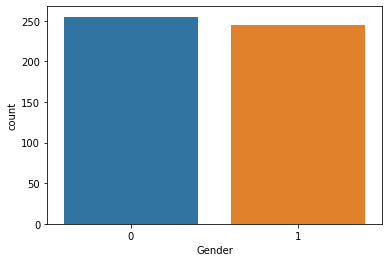

In [20]:
sns.countplot(data['Gender'])

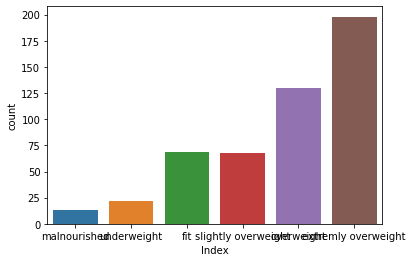

In [21]:
sns.countplot(data['Index'])

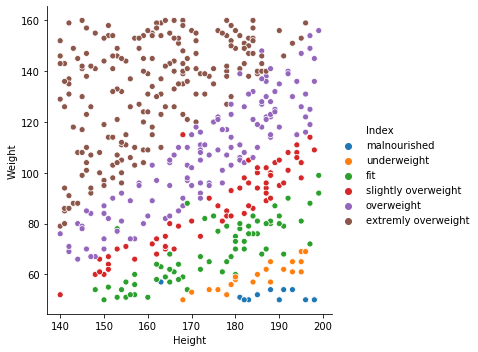

In [24]:
sns.relplot(x="Height",y="Weight",hue="Index",data=data)

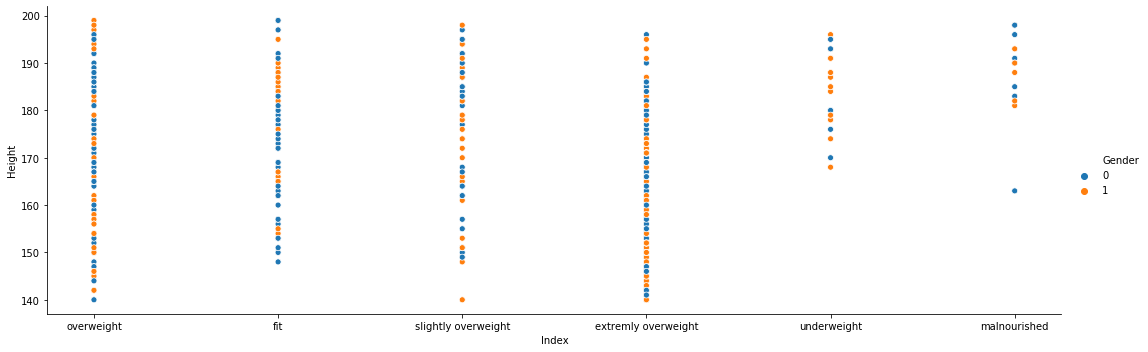

In [27]:
sns.relplot(x="Index",y="Height",hue="Gender",data=data,height=5,aspect=3)

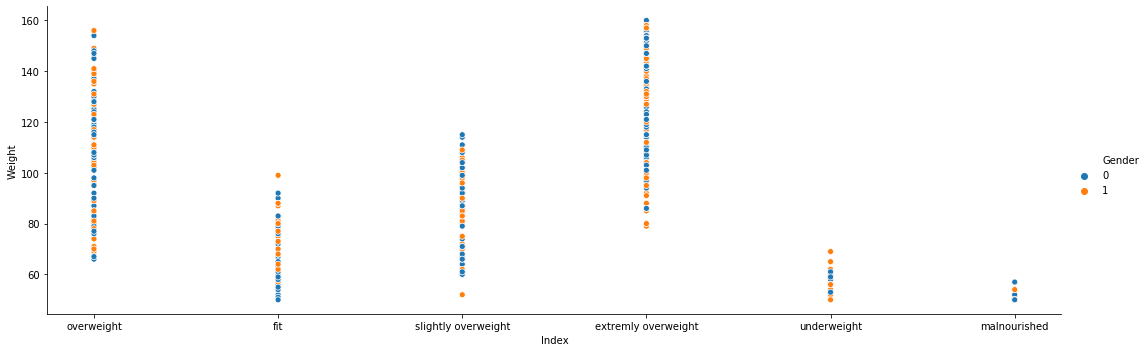

In [29]:
sns.relplot(x="Index",y="Weight",hue="Gender",data=data,height=5,aspect=3)

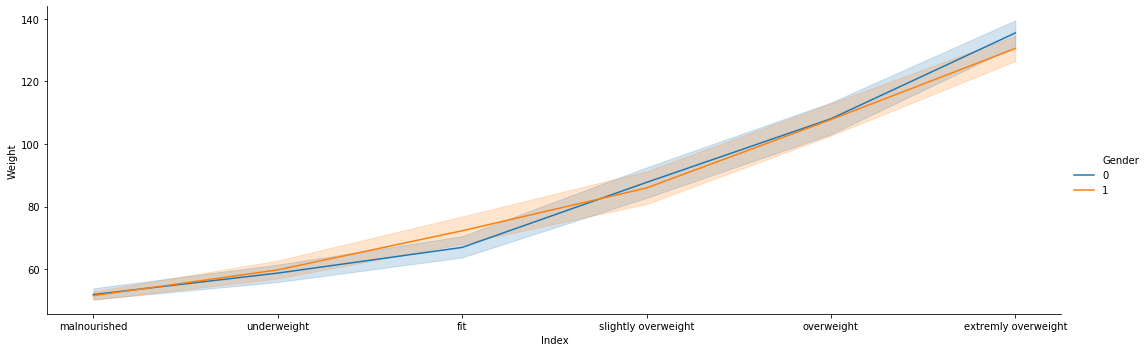

In [30]:
sns.relplot(x="Index",y="Weight",hue="Gender",kind="line",data=data,height=5,aspect=3)

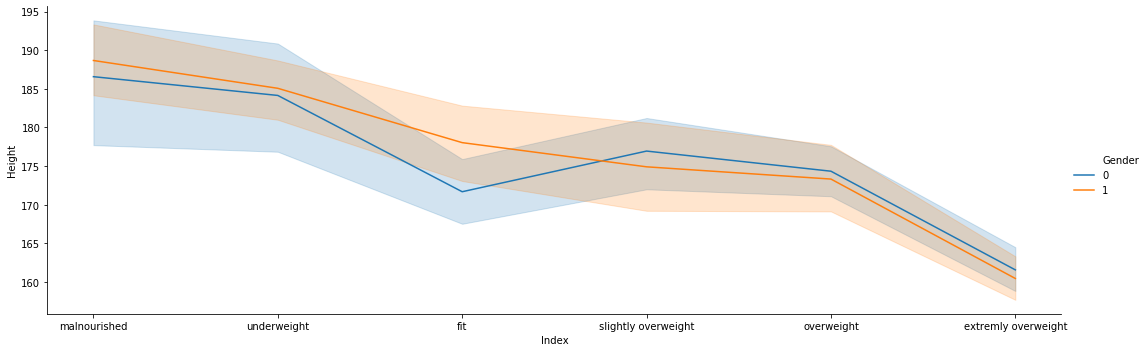

In [35]:
sns.relplot(x="Index",y="Height",hue="Gender",kind="line",data=data,height=5,aspect=3)

In [36]:
x=data.drop("Index",axis=1)
y=data["Index"]

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [39]:
s=StandardScaler()
x_train=s.fit_transform(x_train)
x_test=s.transform(x_test)

In [41]:
clf=svm.SVC()
clf.fit(x_train,y_train)
pred=clf.predict(x_test)

In [42]:
print(classification_report(y_test,pred))

                     precision    recall  f1-score   support

extremly overweight       0.88      0.97      0.92        36
                fit       0.73      0.80      0.76        10
       malnourished       0.00      0.00      0.00         3
         overweight       0.96      0.78      0.86        32
slightly overweight       0.78      0.93      0.85        15
        underweight       0.60      0.75      0.67         4

           accuracy                           0.85       100
          macro avg       0.66      0.71      0.68       100
       weighted avg       0.84      0.85      0.84       100



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [43]:
print(confusion_matrix(y_test,pred))

[[35  0  0  1  0  0]
 [ 0  8  0  0  2  0]
 [ 0  1  0  0  0  2]
 [ 5  0  0 25  2  0]
 [ 0  1  0  0 14  0]
 [ 0  1  0  0  0  3]]


In [44]:
print(accuracy_score(y_test,pred))

0.85


In [45]:
a=[[0,160,48]]
a=s.transform(a)
b=clf.predict(a)

In [46]:
b

array(['fit'], dtype=object)

In [47]:
data

,Gender,Height,Weight,Index
0,1,174,96,overweight
1,1,189,87,fit
2,0,185,110,overweight
3,0,195,104,slightly overweight
4,1,149,61,slightly overweight
5,1,189,104,slightly overweight
6,1,147,92,extremly overweight
7,1,154,111,extremly overweight
8,1,174,90,slightly overweight
9,0,169,103,overweight


In [48]:
a=[[0,185,90]]
a=s.transform(a)
b=clf.predict(a)

In [49]:
b

array(['slightly overweight'], dtype=object)